In [ ]:
pwd

In [1]:
data_path='/home/jlam/projects/dl_w_python_nb/data/aclImdb/'

In [ ]:
ls {data_path}

### data prep

In [2]:
import os


In [3]:
train_dir = os.path.join(data_path,'train')

In [ ]:
ls {train_dir}

In [4]:
def load_data(dir_name):
    """
        load data from directory to list
        expects pos and neg subdirectories in dir_name
        returns texts, labels as lists
    """
    labels = []
    texts = []
    
    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(train_dir,label_type)
        for fname in os.listdir(dir_name):
            if fname[-4:]=='.txt':
                f = open(os.path.join(dir_name,fname))
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)
    return texts, labels

In [5]:
texts, labels = load_data(train_dir)

In [6]:
len(texts),len(labels)

(25000, 25000)

### build word indexes

In [7]:
# parameters
max_words = 20000
max_length = 100
embedding_dim = 8

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Using TensorFlow backend.


In [9]:
tokenizer = Tokenizer(num_words=max_words) #initialize by keeping 10,000 words
tokenizer.fit_on_texts(texts) # train
sequences = tokenizer.texts_to_sequences(texts)

In [10]:
len(sequences)

25000

#### get word index from tokenizer

In [11]:
word_index = tokenizer.word_index
print('found %s unique tokens.' % len(word_index))

found 88582 unique tokens.


In [12]:
word_index['man']

129

#### pad sequence to max_len & convert labels to 1d array

In [13]:
data = pad_sequences(sequences,max_length)
labels = np.asarray(labels)

In [14]:
len(data[0])

100

In [15]:
x_train=data
y_train=labels

### building model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding


In [ ]:
model = Sequential()
# input dim - len of vocab + 1
# output dim - dimension of dense embedding
# max length - required to connect to flatten layer
# after embedding, the shape is (samples, maxlen, 8)
model.add(Embedding(max_words, embedding_dim, input_length=max_length))
# flatten the 3D tensor of embeddings into a 2D tensor of shape
# , shape is (samples, maxlen * 8)
model.add(Flatten())
# why add relu?
model.add(Dense(32, activation='relu'))
# add classification on top
model.add(Dense(1, activation='sigmoid'))
# add optimizer, loss function and metric
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

### Simple RNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

max_features = max_words
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop'
             , loss='binary_crossentropy'
             , metrics=['acc'])

history = model.fit(x_train
                    ,y_train
                   ,epochs=10
                   ,batch_size=128
                   ,validation_split=0.2)

In [ ]:
history = model.fit(x_train,y_train,
                   epochs=20,
                   batch_size=32,
                   validation_split=0.2)

In [17]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # plot accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    
    # plot loss
    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()
    
    

In [ ]:
plot_history(history)

In [ ]:
plot_history(history) # adding relu

In [ ]:
plot_history(history) #20,000 words

In [ ]:
# RNN results
plot_history(history)

### LSTM Model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

max_features = max_words
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop'
             , loss='binary_crossentropy'
             , metrics=['acc'])

lstm_history = model.fit(x_train
                    ,y_train
                   ,epochs=10
                   ,batch_size=128
                   ,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 360us/step - loss: 0.5346 - acc: 0.7213 - val_loss: 1.0558 - val_acc: 0.5480
Epoch 2/10
20000/20000 [==============================] - 7s 336us/step - loss: 0.3122 - acc: 0.8732 - val_loss: 0.2154 - val_acc: 0.9254
Epoch 3/10
20000/20000 [==============================] - 7s 335us/step - loss: 0.2349 - acc: 0.9076 - val_loss: 0.5187 - val_acc: 0.7912
Epoch 4/10
20000/20000 [==============================] - 7s 341us/step - loss: 0.1902 - acc: 0.9283 - val_loss: 0.5620 - val_acc: 0.7908
Epoch 5/10
20000/20000 [==============================] - 7s 338us/step - loss: 0.1629 - acc: 0.9422 - val_loss: 1.0308 - val_acc: 0.6842
Epoch 6/10
20000/20000 [==============================] - 7s 336us/step - loss: 0.1403 - acc: 0.9502 - val_loss: 0.4868 - val_acc: 0.8104
Epoch 7/10
20000/20000 [==============================] - 7s 336us/step - loss: 0.1194 - acc: 0.9577 - val_loss: 1.1125 - v

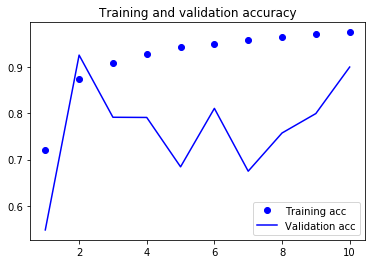

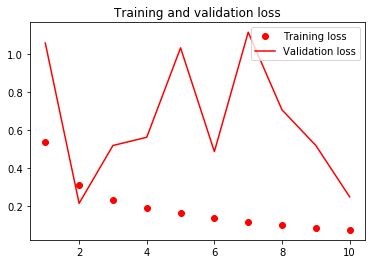

In [18]:
plot_history(lstm_history)